In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [48]:
TRAIN_URL="http://download.tensorflow.org/data/iris_training.csv"
train_path=tf.keras.utils.get_file(TRAIN_URL.split('/')[-1],TRAIN_URL)

In [49]:
df_iris=pd.read_csv(train_path,header=0)

In [50]:
iris=np.array(df_iris)

In [51]:
iris.shape

(120, 5)

In [52]:
train_x=iris[:,0:2]
train_y=iris[:,4]

In [53]:
train_x.shape,train_y.shape

((120, 2), (120,))

In [54]:
x_train=train_x[train_y < 2 ]
y_train=train_y[train_y < 2 ]

In [55]:
x_train.shape,y_train.shape

((78, 2), (78,))

In [56]:
num=len(x_train)

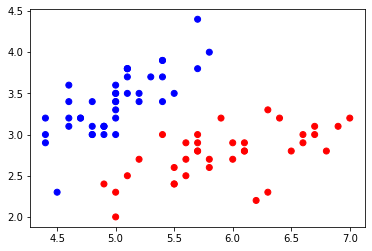

In [57]:
cm_pt=mpl.colors.ListedColormap(["blue","red"])
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_pt)
plt.show()

In [58]:
x_train=x_train-np.mean(x_train,axis=0)

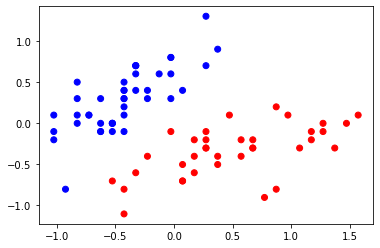

In [59]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_pt)
plt.show()

In [15]:
x0_train=np.ones(num).reshape(-1,1)

In [16]:
X=tf.cast(tf.concat((x0_train,x_train),axis=1),tf.float32)
Y=tf.cast(y_train.reshape(-1,1),tf.float32)

In [17]:
X.shape,Y.shape

(TensorShape([78, 3]), TensorShape([78, 1]))

In [33]:
lean_rate=0.2
iter=120
display_step=30

In [96]:
np.random.seed(612)
W=tf.Variable(np.random.randn(3,1),dtype=tf.float32)

In [97]:
ce=[]
acc=[]
for i in range(0,iter+1):
    with tf.GradientTape() as tape:
        PRED=1/(1+tf.exp(-tf.matmul(X,W)))
        Loss=-tf.reduce_mean(Y*tf.math.log(PRED)+(1-Y)*tf.math.log(1-PRED))
    accuracy=tf.reduce_mean(tf.cast(tf.equal(tf.where(PRED.numpy()<0.5,0.,1),Y),tf.float32))
    ce.append(Loss)
    acc.append(accuracy)
    
    dL_dW=tape.gradient(Loss,W)
    W.assign_sub(lean_rate*dL_dW)
    
    if i % display_step ==0:
        print("i: %i ,Acc:%f, Loss: %f" % (i,accuracy,Loss))
        

i: 0 ,Acc:0.230769, Loss: 0.994269
i: 30 ,Acc:0.961538, Loss: 0.481892
i: 60 ,Acc:0.987179, Loss: 0.319128
i: 90 ,Acc:0.987179, Loss: 0.246626
i: 120 ,Acc:1.000000, Loss: 0.204982


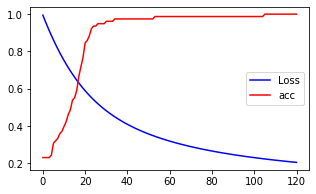

In [98]:
plt.figure(figsize=(5,3))
plt.plot(ce,color='blue',label='Loss')
plt.plot(acc,color='red',label="acc")
plt.legend()
plt.show()

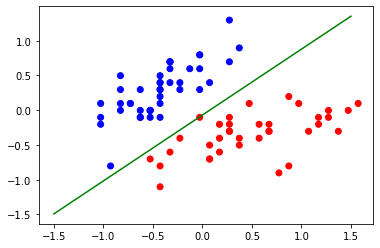

In [99]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_pt)
x_=[-1.5,1.5]
y_=-(W[1]*x_+W[0])/W[2]
plt.plot(x_,y_,color='g')
plt.show()

In [109]:
#绘制决策边界：
np.random.seed(612)
W=tf.Variable(np.random.randn(3,1),dtype=tf.float32)

In [110]:
cm_pt=mpl.colors.ListedColormap(["blue","red"])

In [111]:
x_=[-1.5,1.5]
y_=-(W[1]*x_+W[0])/W[2]

i: 0 ,Acc:0.230769, Loss: 0.994269
i: 30 ,Acc:0.961538, Loss: 0.481892
i: 60 ,Acc:0.987179, Loss: 0.319128
i: 90 ,Acc:0.987179, Loss: 0.246626
i: 120 ,Acc:1.000000, Loss: 0.204982


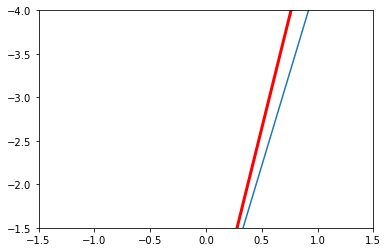

In [112]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_pt)
plt.plot(x_,y_,color='red',linewidth=3)
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1-5])

ce=[]
acc=[]
for i in range(0,iter+1):
    with tf.GradientTape() as tape:
        PRED=1/(1+tf.exp(-tf.matmul(X,W)))
        Loss=-tf.reduce_mean(Y*tf.math.log(PRED)+(1-Y)*tf.math.log(1-PRED))
    
    accuracy=tf.reduce_mean(tf.cast(tf.equal(tf.where(PRED.numpy()<0.5,0.,1.),Y),tf.float32))
    ce.append(Loss)
    acc.append(accuracy)
    
    dL_dW=tape.gradient(Loss,W)
    W.assign_sub(lean_rate*dL_dW)
    
    if i % display_step ==0:
        print("i: %i ,Acc:%f, Loss: %f" % (i,accuracy,Loss))
        y_=-(W[0]+W[1]*x_)/W[2]
        plt.plot(x_,y_)
plt.show()